# Topic :: Association Rules

# Question 2 : 
     Using Movies Dataset

In [1]:
#Importing Libraries

!pip install mlxtend
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [2]:
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Pre-processing

In [4]:
movies_df = pd.get_dummies(movies)
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm

In [5]:
frequent_itemsets = apriori(movies_df,min_support=0.1, use_colnames=True) #mim support 0.1
frequent_itemsets

C:\Users\CHARAN\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, Sixth Sense, LOTR1, V2_LOTR1,..."
1393,0.1,"(V1_Sixth Sense, LOTR2, Sixth Sense, LOTR1, V2..."
1394,0.1,"(V1_Sixth Sense, LOTR2, Sixth Sense, V2_LOTR1,..."
1395,0.1,"(V1_Sixth Sense, LOTR2, LOTR1, V2_LOTR1, Harry..."


In [14]:
rule1 = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.7 ) #confidence 70%
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(V4_Green Mile, V5_LOTR2)","(V1_Sixth Sense, LOTR2, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V5_LOTR2, Green Mile)","(V1_Sixth Sense, LOTR2, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V2_LOTR1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, Ha...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V3_Harry Potter1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [6]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold=0.7) #lift ratio 70%
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V4_Green Mile),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V5_LOTR2),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [7]:
# A high conviction value means that the consequent is highly depending on the antecedent and range[0 inf]

In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, V3_Harry Potter1, V5_LOTR2, LO...","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V2_LOTR1, Harry Potter1, V5_LOTR2)","(Sixth Sense, V4_Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V2_LOTR1, V4_Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, V5_LOTR2, LOTR2)","(Sixth Sense, Harry Potter1, V4_Green Mile, LO...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(Harry Potter1, V4_Green Mile, LOTR2)","(V2_LOTR1, Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Harry Potter1, V5_LOTR2, LOTR2)","(V2_LOTR1, Sixth Sense, V4_Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V4_Green Mile, V5_LOTR2, LOTR2)","(V2_LOTR1, Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(V2_LOTR1, Sixth Sense, LOTR1)","(Harry Potter1, V4_Green Mile, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, Harry Potter1, LOTR1)","(V2_LOTR1, V4_Green Mile, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(Sixth Sense, V4_Green Mile, LOTR1)","(V2_LOTR1, Harry Potter1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V4_Green Mile),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V5_LOTR2),"(LOTR2, V1_Sixth Sense, Sixth Sense, LOTR1, V2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


# Visualization

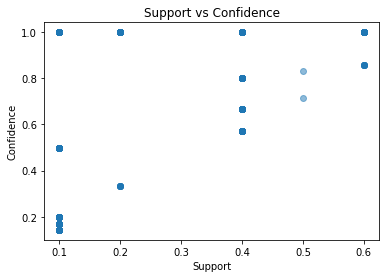

In [13]:
import matplotlib.pyplot as plt 
plt.scatter(rules.support, rules.confidence, alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

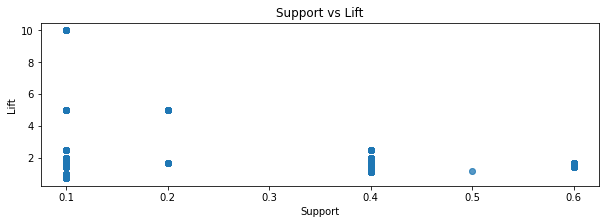

In [16]:
plt.figure(figsize = [10,3])
plt.scatter(rules.support, rules.lift, alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

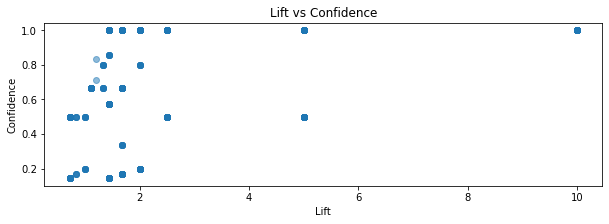

In [17]:
plt.figure(figsize = [10,3])
plt.scatter(rules.lift, rules.confidence, alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()